## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 35 columns):
DAMAGE_PROPERTY       8308 non-null float64
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 1 columns):
DAMAGE_PROPERTY    8308 non-null float64
dtypes: float64(1)
memory usage: 65.0 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 2:34]

tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "MULTI_VORT_IND",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 24 columns):
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP       8308 non-null float64
WOOD_WETLAND_PROP     8308 non-null float64
HERB_WETLAND_PROP     8308 non-null float64
INCOME                8308 non-null float64
MOB_HOME_DENS         8308 non-null float64
POP_DENS              8308 non-null float64
TOT_DEV_INT  

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
 0.5790
 0.1532
 0.2814
[torch.DoubleTensor of size 8308x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-1.6434e+00 -4.3226e-01  1.0059e+00  ...   2.4012e-01  9.9841e-01 -8.0985e-01
 2.0633e-01  5.5447e-01  2.5095e-01  ...   6.0023e-01  2.2936e-01  5.1571e-01
-3.3130e-01 -8.9907e-01  6.5406e-01  ...  -5.8070e-01 -1.0991e+00 -1.1142e+00
                ...                   ⋱                   ...                
-2.3862e-01  6.3729e-01  2.5982e-01  ...   7.2155e-01  3.0761e-01  1.5969e-01
-1.2487e+00  6.1127e-01  1.0901e-01  ...   9.1690e-01  4.8438e-01  2.6054e-01
-4.7014e-01 -3.4764e-02  1.6123e+00  ...   5.8210e-01 -4.3274e-01 -3.8082e-01
[torch.DoubleTensor of size 8308x24]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-1.6434e+00 -4.3226e-01  1.0059e+00  ...   2.4012e-01  9.9841e-01 -8.0985e-01
 2.0633e-01  5.5447e-01  2.5095e-01  ...   6.0023e-01  2.2936e-01  5.1571e-01
-3.3130e-01 -8.9907e-01  6.5406e-01  ...  -5.8070e-01 -1.0991e+00 -1.1142e+00
                ...                   ⋱                   ...                
-2.3862e-01  6.3729e-01  2.5982e-01  ...   7.2155e-01  3.0761e-01  1.5969e-01
-1.2487e+00  6.1127e-01  1.0901e-01  ...   9.1690e-01  4.8438e-01  2.6054e-01
-4.7014e-01 -3.4764e-02  1.6123e+00  ...   5.8210e-01 -4.3274e-01 -3.8082e-01
[torch.FloatTensor of size 8308x24]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 15000))

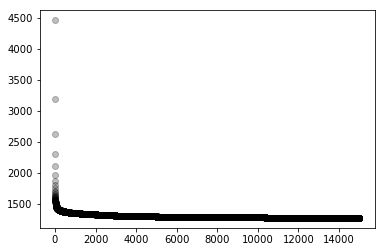

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8308)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

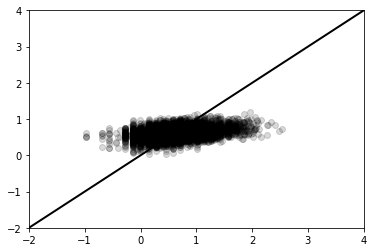

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 1 columns):
DAMAGE_PROPERTY    2808 non-null float64
dtypes: float64(1)
memory usage: 22.0 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 2:34]

valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "MULTI_VORT_IND",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 24 columns):
BEGIN_LAT             2808 non-null float64
BEGIN_LON             2808 non-null float64
OPEN_WATER_PROP       2808 non-null float64
DEV_OPEN_PROP         2808 non-null float64
DEV_LOW_PROP          2808 non-null float64
DEV_MED_PROP          2808 non-null float64
DEV_HIGH_PROP         2808 non-null float64
BARREN_LAND_PROP      2808 non-null float64
DECID_FOREST_PROP     2808 non-null float64
EVERGR_FOREST_PROP    2808 non-null float64
MIXED_FOREST_PROP     2808 non-null float64
SHRUB_SCRUB_PROP      2808 non-null float64
GRASS_LAND_PROP       2808 non-null float64
PASTURE_HAY_PROP      2808 non-null float64
CULT_CROPS_PROP       2808 non-null float64
WOOD_WETLAND_PROP     2808 non-null float64
HERB_WETLAND_PROP     2808 non-null float64
INCOME                2808 non-null float64
MOB_HOME_DENS         2808 non-null float64
POP_DENS              2808 non-null float64
TOT_DEV_INT  

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 479.6348
[torch.FloatTensor of size 1]

In [20]:
# Computing the total sum of squares
# Get a torch Variable of the mean outcome
# Compute mean value
valid_outcomes_mean = (sum(valid_outcomes_Variable) / len(valid_outcomes_Variable))
valid_outcomes_mean = valid_outcomes_mean.data.numpy()[0]

# Make that into a ndarray
valid_outcomes_mean = np.repeat(valid_outcomes_mean, len(valid_outcomes_Variable))

# Turn the array into a torch Tensor
valid_outcomes_mean = torch.from_numpy(valid_outcomes_mean)

# Turn that Tensor into a Variable
valid_outcomes_mean_Variable = Variable(valid_outcomes_mean)

# Compute the TSS
tot_sum_squares = loss_fn(valid_outcomes_mean_Variable, valid_outcomes_Variable)


# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-03 *
 -8.9444
[torch.FloatTensor of size 1]

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2808)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.688844


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

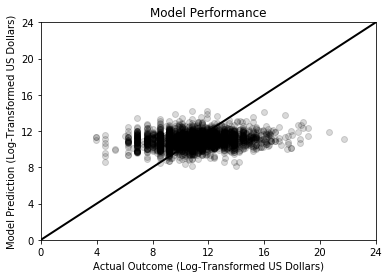

In [23]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [24]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0635 -0.0497  0.1032 -0.1394 -0.0213 -0.1422  0.1327  0.2264 -0.2335 -0.3527
 0.0487 -0.4429  0.0961  0.0810  0.1677 -0.0282  0.1009 -0.1209  0.2560  0.1387
 0.0045  0.1247  0.0544 -0.0800 -0.1151  0.0440 -0.1462  0.1915  0.1085  0.1217
 0.1050  0.0427  0.0917 -0.1143  0.0222  0.0295  0.1321 -0.0793  0.2391 -0.1491
-0.0368  0.2466  0.3406 -0.1950  0.2035  0.1912  0.2248  0.2536  0.4165 -0.0298
-0.1941 -0.1446  0.1427 -0.2825  0.3327  0.1673  0.0262  0.0123  0.3492  0.0869
-0.0874 -0.1030  0.0919  0.0713  0.0111  0.1738  0.0570 -0.2263 -0.0189  0.2156
 0.1076  0.7261  0.0889 -0.2079  0.5529 -0.5576  0.2956  0.0170 -0.3264 -0.0899
-0.4739  0.6057  0.2685 -0.5330 -0.0817  0.0458  0.3268  0.3100 -0.0849 -0.3267
-0.2256 -0.3176 -0.0080 -0.0579 -0.0069  0.1245 -0.1463 -0.1050  0.2058  0.4290
-0.0655 -0.1023 -0.0386 -0.0474  0.3593 -0.6191 -0.1703  0.0697  0.0521 -0.1074
 0.2897 -0.0152 -0.1649  0.3766  0.0331 -0.2726  0.2194 -0.0833  0.0087 -0.0560
-

In [25]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2444 -0.3214  0.2897  0.2729 -0.2937 -0.3134 -0.3290 -0.2680  0.2084  0.3243

Columns 10 to 15 
 0.2154  0.3026  0.2930  0.3706  0.3673  0.2965
[torch.FloatTensor of size 1x16]

## Round 2: Two-Hidden-Layer Neural Network

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 1))

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

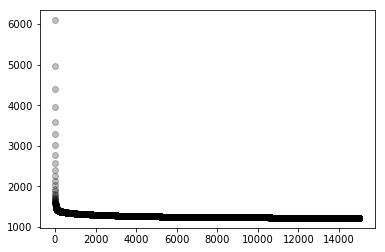

In [29]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

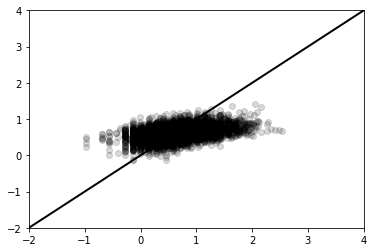

In [31]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [32]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 492.5349
[torch.FloatTensor of size 1]

In [33]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -3.6080
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

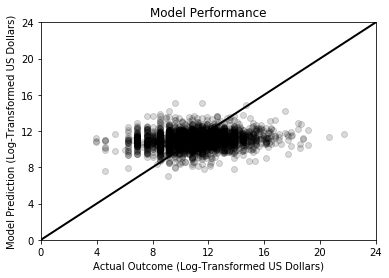

In [35]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [36]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0491  0.1055  0.0739  0.1756 -0.4693  0.5418 -0.2214  0.0699  0.3441  0.1864
 0.1692  0.2184 -0.1262 -0.0396 -0.0262  0.4144 -0.2745  0.0459  0.0946  0.2331
-0.0602 -0.0933 -0.1198  0.3406  0.3451  0.1788  0.1636  0.2772  0.2361 -0.3322
-0.3104  0.3916 -0.0609  0.0860 -0.4016  0.3636 -0.1892 -0.0868  0.3178  0.0649
 0.0013  0.2572 -0.1429  0.2815  0.1850 -0.0560 -0.0797 -0.2836  0.5999  0.3129
 0.2121  0.5206  0.0687  0.0332 -0.0480  0.2238 -0.0061 -0.0296  0.1688  0.4295
 0.3062  0.0372  0.2792  0.1906 -0.0415  0.3336 -0.1438 -0.0076  0.1201 -0.0465
-0.1630  0.2065 -0.0838 -0.0408  0.3951  0.0495 -0.1140 -0.3052 -0.0095  0.2435
-0.0087 -0.0125  0.1000 -0.4274  0.0074  0.2399  0.2020  0.0941  0.3188  0.3287
-0.3838  0.3653  0.2283 -0.0274 -0.1779 -0.0089  0.1135  0.0118 -0.2375 -0.6010
-0.3243  0.0797 -0.4280 -0.0028 -0.0951 -0.1271 -0.1402  0.0043  0.3135 -0.1335
 0.2444 -0.2791 -0.0965  0.0892  0.2558 -0.0686  0.0349 -0.2372 -0.1302 -0.1710
 

In [37]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0916 -0.4137  0.5218  0.0545  0.0091  0.0591 -0.1031 -0.1462 -0.0509  0.2096
 0.3167 -0.0654 -0.1681 -0.2004  0.0665  0.0897  0.1943 -0.1184 -0.0240 -0.1657
 0.0782  0.0152  0.0804 -0.0486  0.2877  0.0226  0.2120  0.2583  0.1307  0.2102
 0.0577  0.0365  0.1809 -0.2155  0.1958  0.2094 -0.0043  0.0621  0.0460  0.1619
-0.2126 -0.0973 -0.1646  0.1678  0.1873  0.3591  0.2518 -0.0126 -0.1807  0.0102
-0.0593  0.3444 -0.2699 -0.1408  0.3733  0.1613 -0.0149 -0.6646  0.0871  0.5313
 0.0143  0.3490  0.3004 -0.4888  0.2406 -1.0159 -1.7461  0.1406 -0.6179 -0.2299
 0.4598 -0.1432  0.2749 -0.3928  0.1462  0.4452  0.0274 -0.3557  0.1773  0.2367
-0.3840 -0.5073  0.1461 -0.2174  0.1004  0.2899  0.2318  0.0722 -0.6124  0.1500
-0.5265 -0.0450  0.4168 -0.0117  0.2677  0.4505 -0.2514 -0.2808  0.0921 -0.3207
-0.1357  0.0177  0.2155 -0.3755  0.4692  0.2123  0.2333  0.0807 -0.1541  0.2353

Columns 10 to 15 
-0.0930  0.1641 -0.0711  0.2611  0.0417  0.3673
 0.4436 -0.249

In [38]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2562 -0.3020  0.3139  0.1310 -0.4630 -0.5757 -1.0211  0.1867 -0.6073 -0.7214

Columns 10 to 10 
 0.5150
[torch.FloatTensor of size 1x11]

## Round 3: Three-Hidden-Layer Neural Network

In [39]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [40]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [41]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

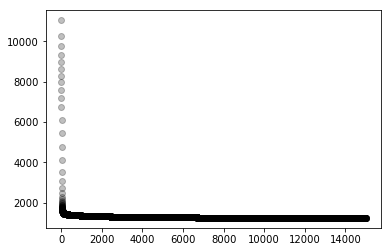

In [42]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [43]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

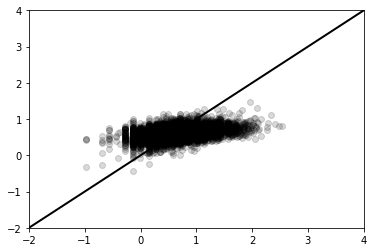

In [44]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [45]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 491.9222
[torch.FloatTensor of size 1]

In [46]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -3.4792
[torch.FloatTensor of size 1]

In [47]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

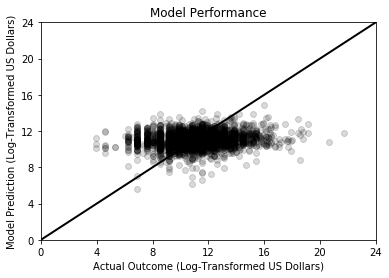

In [48]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [49]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0585  0.2392  0.1503  0.0791  0.1020  0.2153  0.1349  0.2665 -0.1249  0.0344
-0.0519 -0.3448 -0.0221 -0.1157  0.1651 -0.0904  0.1672  0.0239  0.0652 -0.0868
 0.0317  0.2029 -0.1589  0.0727 -0.0868  0.2535 -0.5662 -0.1267 -0.1855 -0.3068
 0.1892  0.1463 -0.1223 -0.0415 -0.3328  0.1005 -0.1857 -0.0437  0.1184 -0.1894
 0.1716  0.1607  0.2381 -0.1007  0.2313  0.1339  0.1428 -0.2683 -0.1596  0.1459
-0.0419  0.1149 -0.0270 -0.2162 -0.2072 -0.1391  0.2394  0.0815  0.2273 -0.1545
 0.1395  0.0171  0.3252 -0.0176  0.1104  0.0156  0.0553 -0.2849  0.2162 -0.3226
-0.3077 -0.0266  0.1246 -0.2824  0.2289  0.1429  0.0093  0.0648  0.1306 -0.0953
-0.2860 -0.0619 -0.0423 -0.1782 -0.2102 -0.0659 -0.0163  0.1515  0.1341  0.4077
 0.0771 -0.2112 -0.0874  0.2872 -0.2327 -0.1833  0.1166 -0.1071 -0.2692 -0.1426
 0.1419 -0.0747 -0.0833  0.0758 -0.1956  0.1931 -0.2158  0.0287 -0.0099 -0.0632
 0.0493  0.0695 -0.2565 -0.1842  0.2210 -0.1380  0.1536  0.0146 -0.0329  0.3366
 

In [50]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.2558 -0.0373  0.1099 -0.2155  0.3605  0.1675  0.1721  0.3106  0.0656  0.1516
-0.0413  0.1380 -0.0670 -0.3126 -0.0100  0.3505  0.0579 -0.1927  0.3162  0.3210
 0.1398  0.3561  0.3617 -0.2042 -0.2227  0.2662  0.2982 -0.1605 -0.0828  0.0008
 0.2987 -0.2745 -0.4375  0.1952  0.2880  0.2143  0.1801  0.1232 -0.1465 -0.3849
-0.1843 -0.4368  0.1052 -0.4756 -0.0606  0.1514 -0.0315  0.0195  0.1982 -0.2286
 0.1035  0.1171 -0.2625 -0.0163 -0.0102  0.2776 -0.3285  0.2519 -0.1555  0.0126
 0.3892 -0.0384 -0.1032 -0.1326  0.0724  0.4137 -0.0668  0.3391  0.2542  0.3044
-0.0362 -0.0799 -0.2615 -0.0190  0.1873  0.0438  0.1367 -0.1039 -0.0343 -0.1531
-0.1575  0.1957  0.2894  0.5789 -0.1774  0.0460 -0.0063  0.0185 -0.0135 -0.4482
-0.1805 -1.0917  0.2581 -0.0964 -0.7174 -0.0673 -0.0075  0.1587  0.4711 -0.7745
 0.2990  0.0035 -0.0032  0.0903 -0.0419  0.4087  0.3698 -0.0928  0.1760  0.0930

Columns 10 to 15 
-0.0970  0.1353 -0.0827  0.1603 -0.0020 -0.0277
 0.0111 -0.175

In [51]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.4471 -0.2079  0.1606  0.4592 -0.1625  0.3105 -0.3330  0.0444  0.3283  0.1705
 0.4040  0.2819  0.1239  0.0031  0.0519 -0.3487  0.1068 -0.0502 -0.0003 -0.8786
 0.0185  0.3014 -0.2634 -0.1382 -1.0691 -0.0031  0.1639  0.4488 -0.3681  0.4502
 0.4591  0.0227  0.1908  0.4840  0.7150 -0.3861  0.1433  0.1510 -0.0391 -1.2286
 0.1946 -0.5644  0.2008 -0.2233  0.2425  0.2822  0.0553  0.6997 -0.4008  0.5246
 0.1623 -0.0871  0.4046  0.0601  0.6495 -0.5645  0.3902  0.0110 -0.0442 -1.3994
-0.0499  0.3895  0.3065  0.3977  0.2360 -0.2399  0.0790 -0.0375  0.1880 -0.6170

Columns 10 to 10 
-0.3859
-0.1099
 0.6080
-0.1884
 0.3192
 0.1436
 0.2702
[torch.FloatTensor of size 7x11]

In [52]:
model[(6)].weight

Parameter containing:
-0.3095  0.3568 -0.4975  0.3028 -0.8988  0.6020  0.3475
[torch.FloatTensor of size 1x7]

## Round 4: Four-Hidden-Layer Neural Network

In [53]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [54]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [55]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

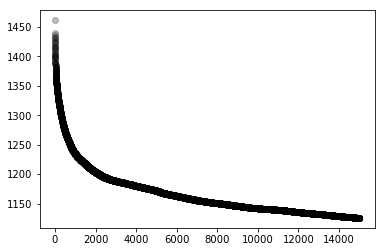

In [56]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

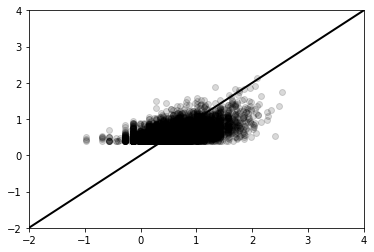

In [58]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [59]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 520.9293
[torch.FloatTensor of size 1]

In [60]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -9.5810
[torch.FloatTensor of size 1]

In [61]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

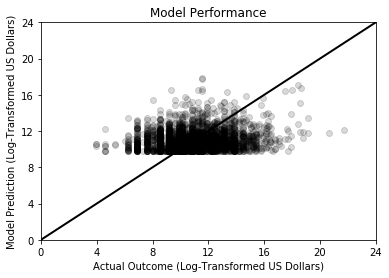

In [62]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [63]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0272  0.0208 -0.0904 -0.2529  0.1074 -0.1404  0.1972  0.0328  0.2225 -0.1377
 0.0340  0.0607 -0.0952  0.1139 -0.1932  0.0430  0.0967  0.1462 -0.1047 -0.0832
 0.0665 -0.1517  0.0881  0.0874  0.2266  0.0995  0.1723 -0.1379 -0.3432 -0.6075
-0.1621  0.2658 -0.0174 -0.2157 -0.0544 -0.0892  0.1222 -0.0297 -0.2912 -0.2391
 0.1585  0.0784 -0.0359 -0.1301  0.1125 -0.0677  0.2097 -0.2997 -0.0796  0.2727
 0.1989 -0.3036  0.1065  0.3787  0.4077  0.0307  0.0920 -0.0182  0.2114  0.1268
-0.2005 -0.3984  0.0782  0.2101  0.2757 -0.2451 -0.0294 -0.0349  0.1707 -0.2006
-0.0524  0.0460  0.0466 -0.1579 -0.1934 -0.0576 -0.1454 -0.1385  0.1959  0.0663
-0.4084 -0.5420 -0.0378  0.0996 -0.0010  0.3086 -0.0791 -0.4028 -0.0864 -0.1235
 0.0014 -0.1244  0.0591  0.2697 -0.1105 -0.0213  0.0836  0.0356 -0.0966 -0.5239
-0.3249 -0.3793 -0.1129 -0.0635  0.1126 -0.0315  0.1805 -0.0466 -0.1213 -0.1709
 0.0956  0.1751 -0.0148  0.1594  0.0825 -0.2338  0.1974 -0.0783 -0.0490  0.0841
 

In [64]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2383  0.2742  0.1201 -0.2286 -0.1710  0.1558  0.2396  0.1987  0.2666 -0.2377
 0.1894  0.0245 -0.4056 -0.8632  0.0855 -0.1787 -0.0833 -0.3009  0.4128  0.3250
-0.2647 -0.1644  0.4796  0.0508 -0.0066  0.1991  0.0195 -0.1686 -0.0142 -0.4180
-0.1432  0.1857  0.0574 -0.1678  0.1622 -0.1049  0.3183  0.1741  0.3079 -0.0434
-0.2458 -0.1862 -0.0329 -0.1675  0.1190  0.3048  0.0344 -0.2920 -0.3401 -0.1892
-0.2057  0.1154 -0.2034  0.0348  0.2833 -0.1380  0.0792 -0.2682 -0.2705  0.3570
-0.2902  0.1661  0.0111  0.0437  0.2151 -0.1281 -0.1051  0.1138  0.0921  0.3917
 0.2923  0.2790 -0.2704  0.1502  0.0827 -0.1462  0.3048 -0.0261  0.0355 -0.0823
 0.3620 -0.1117 -0.4845 -0.0938 -0.1111 -0.0404  0.1742  0.0314  0.2576  0.3925
-0.7051  0.1080 -0.2149  0.1769  0.3117  0.2426  0.3018 -1.1777  0.3307  0.1562
 0.0796 -0.0336 -0.0099  0.0151 -0.1294 -0.4083 -0.3303  0.1748  0.4010 -0.1392

Columns 10 to 15 
-0.1601 -0.1188 -0.2088  0.2099  0.0482 -0.1058
-0.4286 -0.155

In [65]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.6550  0.0161 -0.5273 -0.6905  0.2374  0.1824 -0.1279 -0.1082  0.1119  0.0166
 0.7160  0.0513 -0.5140 -0.4463 -0.3871  0.3522 -0.5527  0.5383 -0.0645  0.2481
 0.4351 -0.2582  0.5221 -0.1952 -0.1484  0.2691 -0.5972  0.1148  0.1446  0.4827
 0.0758 -0.2139 -0.2228  0.4279 -0.0928 -1.0895  0.4047  0.1568  0.0994  0.1041
-0.0969 -1.3990 -0.5530  0.3739  0.3846 -0.4353  0.0097  0.3155 -1.0764  0.3144
 0.0341 -0.0973  0.3001 -0.2304 -0.0506  0.0136 -0.1710  0.0386  0.0983 -0.2549
 0.2302 -0.2075 -0.1696 -0.1698  0.0013 -0.0582  0.0950 -0.2364 -0.1268 -0.1205

Columns 10 to 10 
 0.2992
-0.6559
 0.4482
-0.3919
 0.2070
-0.0839
 0.0550
[torch.FloatTensor of size 7x11]

In [66]:
model[(6)].weight

Parameter containing:
-1.4145 -0.3682 -0.7280  0.4038  0.9547 -0.1474  0.3580
-1.0417 -0.4141 -0.7476  0.4185  1.0529 -0.0508 -0.0572
-0.2167 -0.6679 -0.3274  0.0576  1.1667  0.1209  0.2469
-0.3536  0.3556 -0.0620 -0.2098 -0.1193 -0.0942 -0.3694
-0.4093 -0.8018 -0.1200  0.4782  0.3199 -0.3166 -0.1459
[torch.FloatTensor of size 5x7]

In [67]:
model[(8)].weight

Parameter containing:
 1.4508  0.5463  0.6939  0.0101  0.8395
[torch.FloatTensor of size 1x5]

## Round 5: Five-Hidden-Layer Neural Network

In [68]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [69]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [70]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

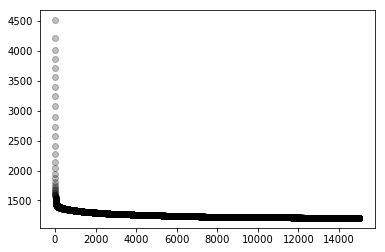

In [71]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [72]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

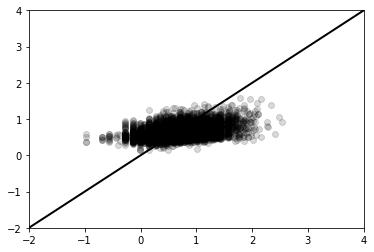

In [73]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [74]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 511.9985
[torch.FloatTensor of size 1]

In [75]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -7.7024
[torch.FloatTensor of size 1]

In [76]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

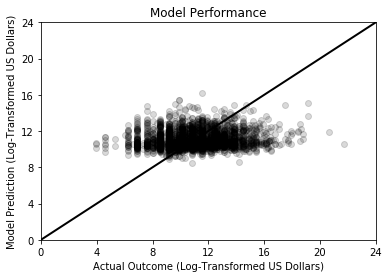

In [77]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [78]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0534 -0.1713  0.4981 -0.0524  0.2468  0.3651  0.3282 -0.2297  0.0887 -0.4235
 0.0751  0.3096 -0.3162 -0.4355 -0.0366 -0.1094  0.1046 -0.3587  0.1514  0.0622
-0.1904 -0.0483  0.1324 -0.0807 -0.1765 -0.1889 -0.3711  0.0986 -0.2296  0.3448
 0.0048  0.1958  0.1677  0.6791  0.2305 -0.0647  0.0078  0.1857  0.1254  0.3793
 0.2731 -0.1028  0.0155  0.0315 -0.0809  0.3222  0.0162  0.1585  0.1808 -0.2634
-0.5697 -0.1641  0.2984 -0.2533  0.3117 -0.2596 -0.2685 -0.0615 -0.0672 -0.2200
-0.1525 -0.1012 -0.2325 -0.3738  0.3765  0.0737 -0.1976 -0.2454 -0.0222  0.0268
 0.1838  0.0537 -0.2182 -0.1962  0.1417 -0.0115  0.4447 -0.1852  0.1574  0.2817
 0.4821  0.4476  0.0287 -0.1134 -0.0727  0.0566  0.2252  0.0842  0.1096 -0.3369
-0.1146 -0.0390  0.2110 -0.3096 -0.1393  0.1616 -0.1759 -0.0602  0.1753  0.0440
-0.0573 -0.2637 -0.0287 -0.2372  0.2394 -0.0087 -0.3065 -0.0671  0.1012  0.2526
 0.0407 -0.1397 -0.0604  0.3386  0.0721 -0.2432  0.2846 -0.0917  0.0306 -0.2008
 

In [79]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0741 -0.0065  0.2484  0.3486  0.1523  0.1070  0.0123  0.3883 -0.1338 -0.3238
 0.2909  0.3012  0.3186  0.4808 -0.0652  0.5703  0.4030  0.0880 -0.0440  0.0915
-1.9210 -0.1178  0.3787 -0.0079 -1.5407  0.3175  0.2426  0.3259  0.3203  0.1991
-0.0886  0.1179  0.2210  0.0534  0.1822  0.4670 -0.4003 -0.1115 -0.1140 -0.3953
 0.3193  0.2456  0.0969  0.4931  0.0159 -0.0808  0.3580  0.1322  0.1405 -0.1883
 0.2400  0.3001  0.2044  0.1034 -0.3141  0.4878 -0.0310  0.4025 -0.5341  0.1037
 0.3370  0.1843  0.0713 -0.3630 -0.0433  0.0504 -0.2173 -0.0672  0.5335 -0.3296
 0.0228  0.1245  0.0184  0.1131  0.2306  0.2056  0.1727  0.1985  0.0619 -0.1293
 0.1165  0.0556  0.2264  0.4475  0.3000  0.1593  0.2670  0.0602  0.2538  0.1069
 0.1900  0.0992  0.3454  0.3494  0.2391 -0.1421  0.1581 -0.2216 -0.0374 -0.0560
-0.0318 -0.0196 -0.1221  0.1411  0.1729  0.3637 -0.0522 -0.1516  0.3680 -0.0345

Columns 10 to 15 
 0.2737 -0.0090  0.3218  0.1810 -0.1289  0.0938
 0.1439  0.181

In [80]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2173  0.4023  0.5029 -0.5311  0.2704 -0.3054 -0.7876  0.2528  0.1946 -0.1012
 0.1675 -0.1173  0.8676 -0.7543 -0.0072 -0.4335  0.1900  0.3586  0.2192 -0.0926
 0.2472 -0.1198 -0.7235 -0.1305  0.3004  0.8726  0.1715  0.2063  0.3634  0.1577
 0.4198  0.0914 -0.5032  0.0037  0.2160  0.2417  0.1203  0.1340 -0.1900  0.3427
 0.2287  0.1560 -0.5071 -0.0716  0.0508  0.4145 -0.1075  0.1024  0.1977  0.2193
-0.2913 -0.0356  0.0072  0.0806 -0.2329 -0.2049 -0.1920 -0.0919  0.2283 -0.0330
 0.3697  0.1148 -0.4286  0.3043  0.3196  0.4534 -0.2441  0.4152  0.3080  0.2649

Columns 10 to 10 
-0.0433
-0.4688
-0.1349
 0.5064
-0.2824
-0.2229
 0.2224
[torch.FloatTensor of size 7x11]

In [81]:
model[(6)].weight

Parameter containing:
-0.8946 -1.2004  0.1942  0.0995  0.3583  0.2208  0.2483
-0.6016 -0.4840  0.3282  0.0863 -0.0429  0.0041  0.2606
-0.3162 -0.1649 -0.2812  0.1460 -0.0848 -0.2305 -0.0803
 0.0577 -0.2702  0.2572 -0.3227  0.0576  0.2973 -0.2047
-0.3505 -0.7471  0.5177 -0.2410  0.1355 -0.0276 -0.1556
[torch.FloatTensor of size 5x7]

In [82]:
model[(8)].weight

Parameter containing:
 0.2268  0.4489 -0.0750 -0.2461 -2.3282
 0.5379  0.1016  0.1098  0.1713 -2.4296
-0.2941  0.2348  0.3101  0.0025 -0.4301
[torch.FloatTensor of size 3x5]

In [83]:
model[(10)].weight

Parameter containing:
 0.6583  1.6461  0.3737
[torch.FloatTensor of size 1x3]

## Round 6: Six-Hidden-Layer Neural Network

In [84]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [85]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [86]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

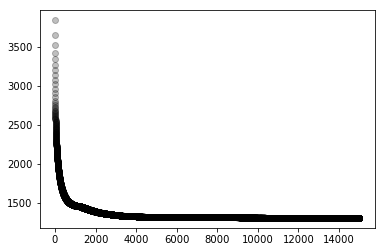

In [87]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [88]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

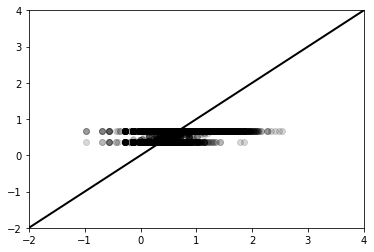

In [89]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [90]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 482.9814
[torch.FloatTensor of size 1]

In [91]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -1.5984
[torch.FloatTensor of size 1]

In [92]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

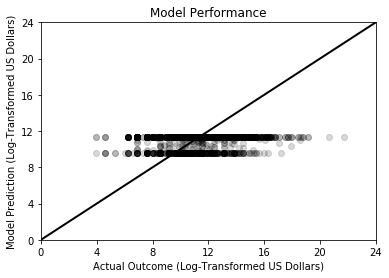

In [93]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [94]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0105 -0.3707 -0.2377 -0.2705  0.2697 -0.1239  0.2785 -0.4299 -0.0962 -0.0943
-0.3595  0.0269 -0.1596 -0.0615 -0.2839 -0.0552  0.1023  0.0840 -0.2484  0.0775
 0.2166  0.1412 -0.1645  0.7073 -0.1004  0.2040 -0.3029 -0.1512 -0.1509  0.2385
 0.0189 -0.2703  0.0565  0.5885 -0.0464 -0.5477 -0.0592  0.1157  0.1597 -0.3036
 0.1252  0.0514 -0.0558 -0.5428  0.0243  0.0991  0.3068 -0.1711 -0.1261  0.1000
-0.1384 -0.1134  0.0014  0.0442  0.1109 -0.0111  0.3387 -0.3723 -0.1200 -0.3760
 0.2671  0.3447 -0.2540 -0.1861  0.0925  0.2568 -0.1159 -0.1464  0.4223  0.1895
-0.2238  0.2706  0.1739 -0.3225 -0.1737  0.0432 -0.2380 -0.1796 -0.0079  0.2243
-0.2102  0.1085  0.1946  0.0717  0.0652 -0.2004 -0.0119  0.2402  0.0046  0.5717
 0.1915  0.3015  0.2185  0.4366  0.1518 -0.1141  0.1714  0.1811 -0.0062  0.3306
-0.4053 -0.1971  0.3239 -0.0169 -0.1258 -0.2814 -0.3163  0.1911  0.0495  0.5314
-0.0697 -0.4738  0.2169 -0.0257  0.0491 -0.2130  0.1090 -0.1763 -0.4386 -0.0916
-

In [95]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0256  0.2983  0.0663  0.0096 -0.3309 -0.4570  0.3322  0.3225 -0.3144 -0.1115
 0.4218 -0.2432  0.1898 -0.6118 -0.0984 -0.1368 -0.5173 -0.2669  0.2785 -0.0037
-0.1338 -0.3201 -0.0613  0.0614  0.0032 -0.0642  0.2056  0.2613  0.1585  0.0011
 0.0861  0.3408  0.1346  0.1615 -0.0835  0.0168  0.1522  0.1106  0.2611  0.0387
 0.3551 -0.0862 -0.2872  0.1674  0.3114  0.4325  0.2882 -0.1135  0.2665  0.1095
 0.0600  0.1191  0.5306 -0.1089 -0.4352 -0.0988 -0.6415 -0.6128 -0.0651 -0.7659
-0.0257 -0.1159 -0.1054  0.1179  0.2932  0.1138  0.1827  0.2148 -0.0412  0.2498
 0.4039  0.1173 -0.0336  0.1347 -0.1844  0.4813 -0.0476 -0.1989 -0.1171  0.3587
 0.1933  0.2011  0.3441 -0.0038  0.0238 -0.1717 -0.3930  0.2434  0.0630  0.1222
 0.1650 -0.0652  0.2553  0.2331  0.2150  0.0409 -0.1785  0.2837 -0.0457  0.0151
-0.3133  0.5152 -0.8301  0.0634 -0.6832  0.4438  0.0334 -0.8961  0.4702 -0.1988

Columns 10 to 15 
 0.0024  0.2177  0.1195  0.4534 -0.1223  0.0322
 0.1445  0.130

In [96]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.1448 -0.6739  0.3250  0.3803  0.2466 -0.5601  0.0972  0.3345  0.1120  0.3331
 0.1145 -0.4803  0.2238  0.1050  0.1664 -0.1645  0.3318  0.0848 -0.1114  0.0180
-0.0459 -0.4059  0.2328  0.3175  0.4590 -0.9794  0.1301  0.2012 -0.0017  0.3834
-0.2135 -0.2435  0.2468  0.1514  0.0495 -0.3843  0.0347  0.3316  0.3771  0.1601
-0.0207  0.4310  0.1871 -0.0224 -0.1821  0.9339 -0.2945  0.1013  0.2170  0.1168
 0.8126  1.0041 -0.5372 -0.0831 -0.5118  0.7000 -0.1541 -0.4450  0.6714  0.4759
 0.3907  0.6025 -0.0098  0.2317 -0.0555  1.0014 -0.1674 -0.1849  0.4203  0.3574

Columns 10 to 10 
-1.1189
-1.0204
-1.5425
-1.0120
 1.3199
 0.2605
 1.4351
[torch.FloatTensor of size 7x11]

In [97]:
model[(6)].weight

Parameter containing:
 0.1528 -0.6493 -0.4294  0.1556  0.7787  0.3656  0.5628
-0.4663  0.0170 -0.3199 -0.1529  0.4061  0.8897  0.8498
-0.0320  0.2522  0.2201 -0.2727  0.2965 -0.1181 -0.3729
-0.3754 -0.0968 -0.2170  0.0925 -0.0370 -0.0691 -0.2497
 0.2952  0.5158  0.3025  0.5296 -0.5884 -0.7744  0.1255
[torch.FloatTensor of size 5x7]

In [98]:
model[(8)].weight

Parameter containing:
-0.0727  0.3150 -0.3907 -0.0985 -0.3966
-1.4794 -1.3198  0.1357 -0.1636  0.4774
-1.3429 -1.1957 -0.2338 -0.1095  0.3052
[torch.FloatTensor of size 3x5]

In [99]:
model[(10)].weight

Parameter containing:
-0.1748 -0.1523 -0.2904
-2.0608 -0.4926 -0.8029
[torch.FloatTensor of size 2x3]

In [100]:
model[(12)].weight

Parameter containing:
-0.4401 -0.6152
[torch.FloatTensor of size 1x2]

## Round 7: Linear Regression

In [101]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [102]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(24, 1))

In [103]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

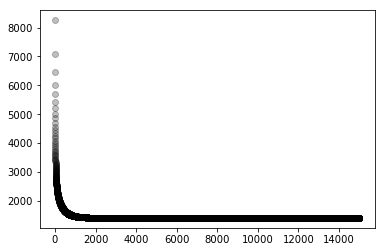

In [104]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [105]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

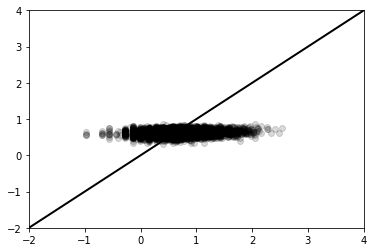

In [106]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [107]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 464.4861
[torch.FloatTensor of size 1]

In [108]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
  2.2922
[torch.FloatTensor of size 1]

In [109]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

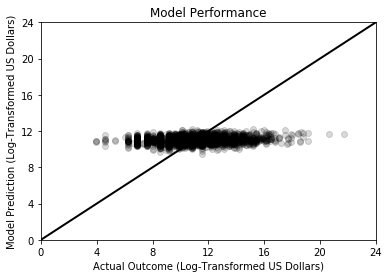

In [110]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [111]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
1.00000e-02 *
  3.0725  0.2862 -0.1286 -1.5020  1.4820 -2.7199  0.2057  0.2594  3.9689  1.3409

Columns 10 to 19 
1.00000e-02 *
 -0.0607 -1.3752  1.3030 -2.0414  0.6833  0.5890  0.6235 -0.6528  3.2012  0.3652

Columns 20 to 23 
1.00000e-02 *
  5.0232 -4.0452  3.1468 -2.0732
[torch.FloatTensor of size 1x24]